# Trabajo: Eliminación de artefactos impulsivos en una imagen

### Objetivos:

El objetivo de esta actividad es familiarizarse con el tratamiento del ruido de naturaleza impulsiva. Para ello, se pide que el alumno sea capaz de generar de forma artificial los artefactos de este tipo, así como de aplicar los filtros necesarios para su eliminación.

### Descripción: 

Se ha de crear funciones o scripts en Python basados en el uso de las librerías NumPy y skimage. Estas deben llevar a cabo diferentes operaciones que se describen a continuación. Para ellas, se tomará como entrada la imagen Astronaut, disponible en la librería skimage.


In [176]:
#importaciones necesarias para el manejo de la imagen 

import matplotlib.pyplot as plt 

from skimage import data #importamos la imagen de la astronauta 
from skimage.morphology import rectangle #realiza el procesamiento por areas rectangulares
from skimage.filters import median, roberts, sobel #importancion de filtros  
from skimage.color import rgb2gray #aplanamos la imagen (Le quitamos los la capa de colores) 
import numpy as np
import random as r #generador de numeros aleatorios para el ruido 
from skimage import img_as_ubyte #nos permite conservar los valores int en la imagen 


**Funcion para ver imagenes**: Para ver la imagen vamos a crear una funcion que permite la visualizacion de la imagen, para ella nos hemos "inspirado" en el codigo dado en la clase magistral "Comenzando con el procesamiento de imagenes" de la materia percepcion computacional. 

In [4]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(7,7)) #tamano de la imagen
    ax.imshow(img, cmap=plt.cm.gray)  #Comando que muestra la imagen
    ax.set_xticks([]), ax.set_yticks([])  #Evita que aparezcan los numeros de los ejes el cuadro de matplotlib
    plt.show()


**Cargue de la imagen**: Realicemos la carga de la imagen del astronauta para empezar a trabajar con ella. 

In [174]:
imagen = img_as_ubyte(rgb2gray(data.astronaut())) #Realizamos la carga de la imagen y adicionalmente con esta funcion la 2D en escala de grises    
imagen.shape #vemos el tamano de la imagen en este caso de 512px * 512px


C:\Users\dicue\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(512, 512)

Veamos que imagen cargamos y si esta se encuentra en escala de grises. 

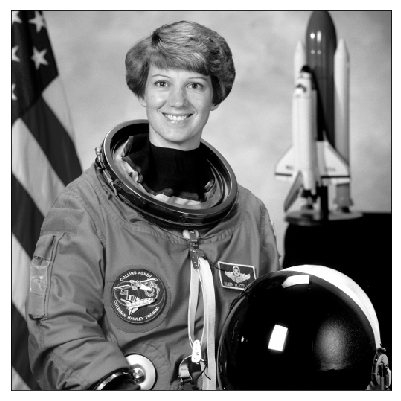

In [175]:
imshow(imagen) #llamamos a la funcion para poder cargar la imagen. 

### Tareas a realizar en la actividad:

Crear una función que modele la adición, de forma aleatoria, de artefactos impulsivos. El resultado tendrá que apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta». Como se ha visto en la asignatura, estos artefactos toman valores de intensidad máximos o mínimos y afectan, aleatoriamente, a los píxeles de la imagen.

La función a implementar debe aceptar la imagen original y devolver la imagen afectada por el ruido. Además, sería deseable que aceptara un argumento adicional para indicar el porcentaje de píxeles que se verán afectados por estos artefactos.

Vamor a crear una funcion que le agregue ruido tipo **"Sal y Pimienta"** a nuestra imagen, la cual reciba una imagen inicialmente, y el porcentaje de ruido en la misma y nos revuelva la imagen afectada por el ruido: 

In [108]:
def SalyPimienta(image,porcentaje): #Argumentos que recibe la imagen Imagen y porcentaje de ruido 
    salida = np.zeros(image.shape,np.uint8)  #creamos una matrix de ceros con la misma forma que nuestra imagen
    ruido = 1 - porcentaje     # calculamos el ruido que sera el porcentaje de ruido en la imagen
    for i in range(image.shape[0]):  # nos movemos en la imagen en sus cordenadas X y Y 
        for j in range(image.shape[1]):
            rdn = r.random()        #calculamos un valor aleatorio !Que empiece el sorteo! 
            if rdn < porcentaje:
                salida[i][j] = 0    # asignamos al pixel el negro en caso de que el valor aleatorio sea menor que porcentaje 
            elif rdn > ruido:
                salida[i][j] = 255   # asignamos al pixel el blanco en caso de que el valor aleatorio sea mayor que ruido
            else:
                salida[i][j] = image[i][j] #En caso contrario asignamos el pixel de la imagen original
    return salida

Agreguemos ruido a la imagen, con un porcentaje de ruido de 3%

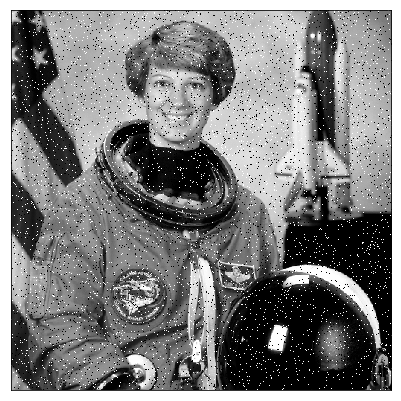

In [159]:
imagen1 = SalyPimienta(imagen,0.03)
imshow(imagen1) 

Como podemos observar en la imagen anterior, el porcentaje de ruido del 3% causa que la imagen se vea con mucho ruido, tanto puntos blancos como negros causados por nuestra funcion de "Sal y Pimienta"

### Eliminando el ruido

A partir de la imagen ruidosa, buscaremos eliminar los artefactos impulsivos para el posterior tratamiento de la imagen. Para ello, se deberá aplicar un filtro adecuado para este tipo de ruido.

Ahora usaremos la funcion **median** de la libreria "skimage.filters" que eliminara el ruido en nuestra imagen de la astronauta, para ello hemos utilizado un rectangulo de 2x2 veamos el resultado de aplicar la funcion con dicho tamaño de area en la cual sacaremos la media:  


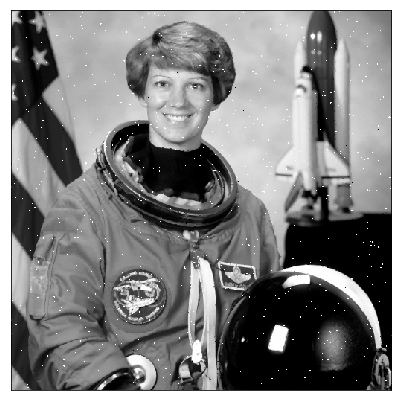

In [161]:
imagenFiltroMedio2x2 = median(imagen1, rectangle(2,2))
imshow(imagenFiltroMedio2x2) 

Como vemos el ruido se a reducido drasticamente pero aun existe aunque en muchisima menor medica comparado con la imagen con ruido original.

Ahora aplicaremos el filtro de media con el rectangulo de 3x3 que es una area mas prometedora ya que permite tener un pixel justo en la mitad de los pixeles circundantes: 

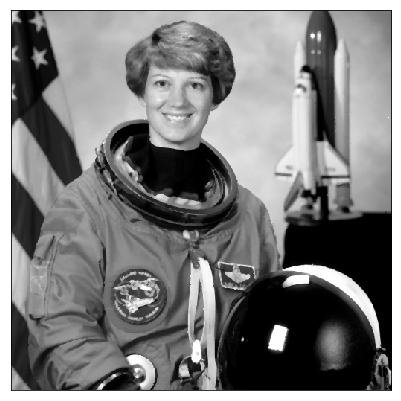

In [162]:
imagenFiltroMedio3x3 = median(imagen1, rectangle(3,3))
imshow(imagenFiltroMedio3x3) 

Como vemos en la imagen el resultado del filtro en un recuadro de 3x3 es optimo ya no aparecen rastros del ruido original,  y comparada con la imagen inicial no parece que nuestra imagen procesada haya perdido mucha calidad, aunque si nos fijamos en la textura del cabello y en los escudos del uniforme,  podemos ver que si hubo perdida de informacion debido al filtro de media que aplicamos. 


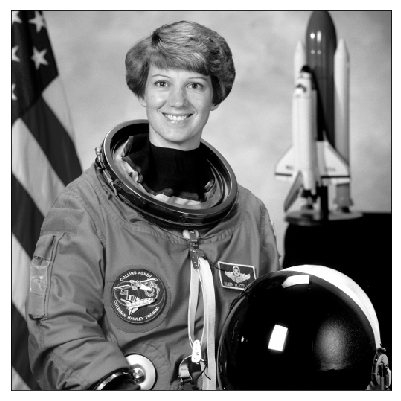

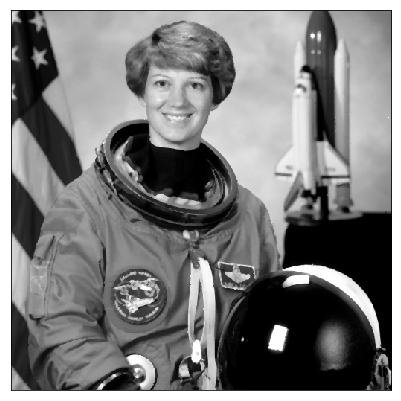

In [163]:
imshow(imagen) 
imshow(imagenFiltroMedio3x3)

**Y que sucede si aplicamos el filtro en un recuadro aun mas grande como por ejemplo 5x5 o 10x10?** como veremos en los siguientes ejemplos, la calidad de la imagen se vera afectada ya que los pixeles se promediaran en areas aun mas grandes lo que provocara que la imagen pierda su nitidez inicial:

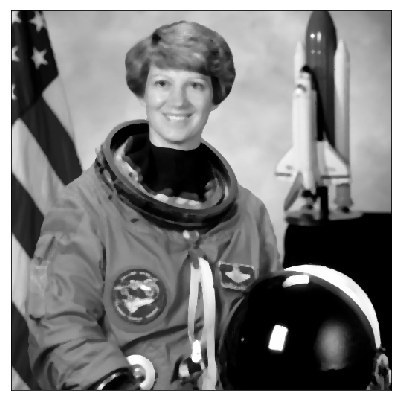

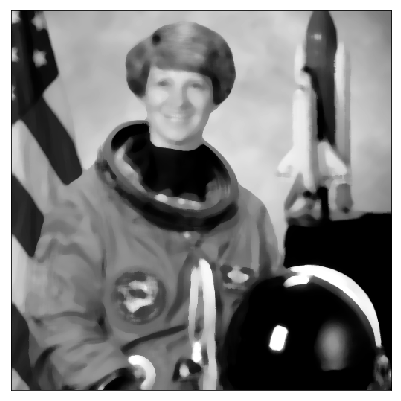

In [165]:
imagenFiltroMedio5x5 = median(imagen1, rectangle(5,5))    #Apliquemos el filtro en recuadros aun mas grande por curiosidad
imagenFiltroMedio10x10 = median(imagen1, rectangle(10,10))
imshow(imagenFiltroMedio5x5) 
imshow(imagenFiltroMedio10x10)

Por último, a partir de la imagen obtenida en la etapa anterior, se busca identificar las siluetas de las estructuras en ella presentes. A este fin, se debe identificar y razonar qué tipo de operador corresponde aplicar.

Para esto vamos a utilizar un filtro paso alto, el cual de acuerdo a la clase es un filtro que magnifica las variaciones o contrastes entre las estructuras de la imagen. 

Para ello skimage cuenta con dos filtros destinados a la deteccion de bordes y siluetas dentro de una imagen, haremos la prueba con las dos y veremos los resultados en nuestra imagen sin filtro 3x3 anteriormente procesada: 

Filtro Roberts


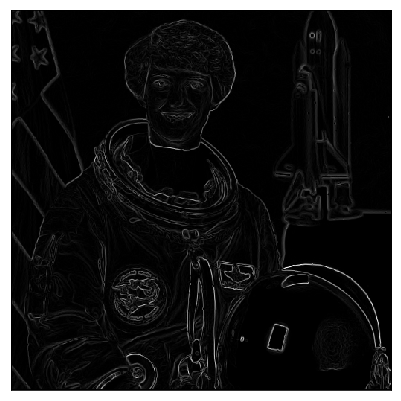

Filtro Sobel


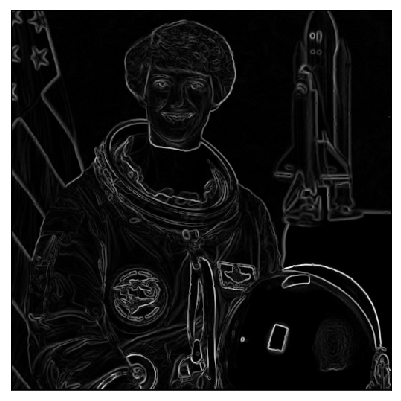

In [172]:
imagenRoberts = roberts(imagenFiltroMedio3x3) #Aplicamos filtro Roberts para la dereccion de siluetas 
imagenSobel = sobel(imagenFiltroMedio3x3)     #Aplicamos filtro Sobel para la deteccion de siluetas
print('Resultado filtro Roberts')
imshow(imagenRoberts)
print('Filtro Sobel')
imshow(imagenSobel)

Vemos que el filtro Sobel arroja resultados mas nitidos, y se alcanzan a distingir siluetas mas sutiles que el filtro Roberts.

**Nota:** La eleccion de estos filtros en particular se basa en la facilidad de su uso y en que vienen incluidos en la libreria skimage. Adicionalmente leyendo las especificaciones de los mismos se basan en el filtro paso alto visto en clase: 

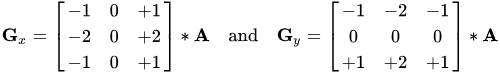
Fuente: https://en.wikipedia.org/wiki/Sobel_operator

**Bibliografia:**

* http://scikit-image.org/docs/0.12.x/api/skimage.filters.html#skimage.filters.roberts
* https://en.wikipedia.org/wiki/Sobel_operator
